<a href="https://colab.research.google.com/github/Aditri-07/BlockHouse-Trial-Work/blob/main/New_Features_BlockHouse_Trial.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [120]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import yfinance as yf

In [121]:
data = pd.read_csv('xnas-itch-20230703.tbbo.csv') #load teh data
data

,ts_recv,ts_event,rtype,publisher_id,instrument_id,action,side,depth,price,size,flags,ts_in_delta,sequence,bid_px_00,ask_px_00,bid_sz_00,ask_sz_00,bid_ct_00,ask_ct_00,symbol
0,1688371200660869841,1688371200660704717,1,2,32,T,B,0,194120000000,1,130,165124,303634,193630000000,194120000000,27,27,1,1,AAPL
1,1688371201201402566,1688371201201237816,1,2,32,T,B,0,194110000000,2,130,164750,304724,193900000000,194110000000,5,400,1,1,AAPL
2,1688371201233688992,1688371201233524761,1,2,32,T,B,0,194110000000,8,130,164231,304850,193900000000,194110000000,5,398,1,1,AAPL
3,1688371201317556361,1688371201317392163,1,2,32,T,B,0,194110000000,2,130,164198,305101,193900000000,194110000000,5,390,1,1,AAPL
4,1688371201478520666,1688371201478356044,1,2,32,T,B,0,194000000000,7,130,164622,306430,193900000000,194000000000,5,200,1,1,AAPL
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59266,1688417954514485218,1688417954514320323,1,2,32,T,B,0,192440000000,6,130,164895,252532002,192400000000,192440000000,40,7,1,1,AAPL
59267,1688417961020718430,1688417961020553920,1,2,32,T,B,0,192440000000,1,130,164510,252532102,192400000000,192440000000,40,1,1,1,AAPL
59268,1688417973297905504,1688417973297741235,1,2,32,T,A,0,192400000000,5,130,164269,252532347,192400000000,192460000000,40,6,1,1,AAPL
59269,1688417996889779362,1688417996889614660,1,2,32,T,B,0,192450000000,3,130,164702,252532944,192400000000,192450000000,35,16,1,1,AAPL


In [122]:
# 1. Liquidity Imbalance
data['liquidity_imbalance'] = (data['bid_sz_00'] - data['ask_sz_00']) / (data['bid_sz_00'] + data['ask_sz_00'])

"""
This feature measures the difference between the available liquidity on the bid and ask sides, normalized by total liquidity.
It helps identify potential pressure points where the market may move due to an imbalance in liquidity.

Implementation - Liquidity imbalance can signal potential price movements as it reflects the supply-demand dynamics in the order book.
"""

'\nThis feature measures the difference between the available liquidity on the bid and ask sides, normalized by total liquidity. \nIt helps identify potential pressure points where the market may move due to an imbalance in liquidity.\n\nImplementation - Liquidity imbalance can signal potential price movements as it reflects the supply-demand dynamics in the order book.\n'

In [123]:

print(data['liquidity_imbalance'].describe())

# Display a sample of the data
print(data[['ts_event', 'liquidity_imbalance']].head())


count    59271.000000
mean        -0.058026
std          0.629203
min         -0.999942
25%         -0.640288
50%         -0.096892
75%          0.529412
max          0.999800
Name: liquidity_imbalance, dtype: float64
              ts_event  liquidity_imbalance
0  1688371200660704717             0.000000
1  1688371201201237816            -0.975309
2  1688371201233524761            -0.975186
3  1688371201317392163            -0.974684
4  1688371201478356044            -0.951220


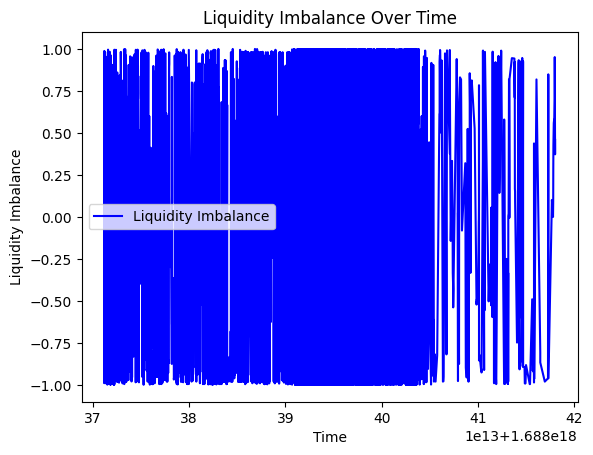

In [124]:
#Positive values indicate a higher bid size relative to the ask size, while negative values indicate a higher ask size relative to the bid size.
#Consecutively, a consistently high positive liquidity imbalance might suggest buying pressure, while a consistently high negative imbalance might suggest selling pressure.

plt.figure()

# Plot liquidity imbalance
plt.plot(data['ts_event'], data['liquidity_imbalance'], label='Liquidity Imbalance', color='blue')
plt.xlabel('Time')
plt.ylabel('Liquidity Imbalance')
plt.title('Liquidity Imbalance Over Time')
plt.legend()
plt.show()

#significant imbalance between bid and ask sizes

In [125]:
# 2. Order Arrival Rate
data['order_arrival_rate'] = data['ts_event'].diff().apply(lambda x: 1/x if x > 0 else 0)

"""
It calculates the rate at which new orders are arriving in the market, based on the timestamp differences in the order book updates.

Implementation - The arrival rate of orders can indicate market activity and sentiment, which may influence price volatility and momentum.
"""


'\nIt calculates the rate at which new orders are arriving in the market, based on the timestamp differences in the order book updates.\n\nImplementation - The arrival rate of orders can indicate market activity and sentiment, which may influence price volatility and momentum.\n'

In [126]:
print(data['order_arrival_rate'].describe())

# Display a sample of the data
print(data[['ts_event', 'order_arrival_rate']].head())

count    5.927100e+04
mean     1.371566e-05
std      1.164988e-04
min      0.000000e+00
25%      0.000000e+00
50%      9.071764e-11
75%      3.164794e-08
max      3.215434e-03
Name: order_arrival_rate, dtype: float64
              ts_event  order_arrival_rate
0  1688371200660704717        0.000000e+00
1  1688371201201237816        1.850025e-09
2  1688371201233524761        3.097227e-08
3  1688371201317392163        1.192358e-08
4  1688371201478356044        6.212574e-09


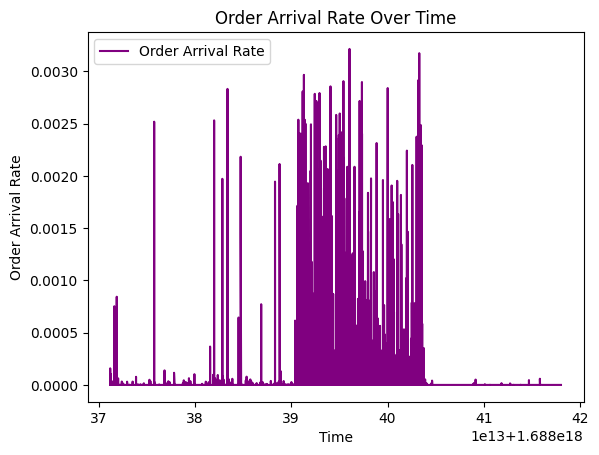

In [127]:
import matplotlib.pyplot as plt

plt.figure()

# Plot order arrival rate
plt.plot(data['ts_event'], data['order_arrival_rate'], label='Order Arrival Rate', color='purple')
plt.xlabel('Time')
plt.ylabel('Order Arrival Rate')
plt.title('Order Arrival Rate Over Time')
plt.legend()
plt.show()

#High order arrival rates generally indicate more active market conditions, which can affect price movements and market liquidity.
#the horizontal lines indicates stability and the spikes/troughs indicates variable (high volatility-hogh trading activity) due to market sentiment, news, etc.

#reduced activity- falling, more stable trend

In [128]:
# 3. Order Book Skew
def calculate_order_book_skew(row):
    bid_sizes = row[['bid_sz_00']].values
    ask_sizes = row[['ask_sz_00']].values
    return np.mean(bid_sizes) - np.mean(ask_sizes)

data['order_book_skew'] = data.apply(calculate_order_book_skew, axis=1)

"""
This feature captures the skewness of the order book by comparing the distribution of order sizes at different price levels.
calculation - diffence between avg bid size and avg ask size

Implementation - Order book skew can provide insights into market participants' sentiment and willingness to trade at different price levels,
indicating potential price direction.
"""

"\nThis feature captures the skewness of the order book by comparing the distribution of order sizes at different price levels.\ncalculation - diffence between avg bid size and avg ask size\n\nImplementation - Order book skew can provide insights into market participants' sentiment and willingness to trade at different price levels, \nindicating potential price direction.\n"

In [129]:
print(data['order_book_skew'].describe())
# Display a sample of the data
print(data[['ts_event','price','order_book_skew']].head())
#Positive Skew: indicates that the average bid size is larger than the average ask size. This suggests a potential buying pressure or stronger demand at the bid side.
#Negative Skew: means that the average ask size exceeds the average bid size. This indicates potential selling pressure or stronger supply at the ask side.
#Zero Skew: bid and ask sizes are approximately balanced.

count    59271.000000
mean        -2.683876
std       2110.796532
min     -34461.000000
25%       -537.000000
50%        -54.000000
75%        423.000000
max      22137.000000
Name: order_book_skew, dtype: float64
              ts_event         price  order_book_skew
0  1688371200660704717  194120000000              0.0
1  1688371201201237816  194110000000           -395.0
2  1688371201233524761  194110000000           -393.0
3  1688371201317392163  194110000000           -385.0
4  1688371201478356044  194000000000           -195.0


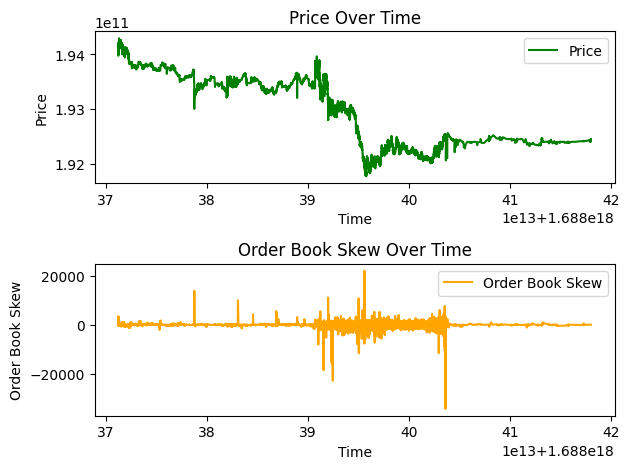

In [130]:
plt.figure()

# Plot price
plt.subplot(2, 1, 1)
plt.plot(data['ts_event'], data['price'], label='Price', color='green')
plt.xlabel('Time')
plt.ylabel('Price')
plt.title('Price Over Time')
plt.legend() #observation- bearish trend

# Plot order book skew
plt.subplot(2, 1, 2)
plt.plot(data['ts_event'], data['order_book_skew'], label='Order Book Skew', color='orange')
plt.xlabel('Time')
plt.ylabel('Order Book Skew')
plt.title('Order Book Skew Over Time')
plt.legend()

plt.tight_layout()
plt.show()

# market responds - The initial spike in order_book_skew during a price decline suggests a significant shift in market dynamics,
# likely due to increased selling pressure - major imbalance between bid and ask sizes just before or during the price drop.
#This could indicate a sudden increase in selling pressure or a large shift in the order book where the ask sizes exceeded bid sizes significantly, potentially accelerating the price decline.

In [131]:
# 4. price momentum

"""
Price momentum helps identify bullish or bearish trends and can signal potential reversals or continuations.
It can be used as a strategies for entry and exit points.
"""

'\nPrice momentum helps identify bullish or bearish trends and can signal potential reversals or continuations.\nIt can be used as a strategies for entry and exit points. \n'

In [132]:
# Calculate the price difference
data['price_diff'] = data['price'].diff()

# Calculate the price momentum
data['price_momentum'] = data['price_diff'].rolling(window=10).mean()

# Drop NaN values
data.dropna(subset=['price_momentum'], inplace=True)


In [133]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
#data['normalized_momentum'] = scaler.fit_transform(data[['price_momentum']])
#data['normalized_price'] = scaler.fit_transform(data[['price']])
data[['price', 'price_momentum']] = scaler.fit_transform(data[['price', 'price_momentum']])


In [134]:
print(data[['price', 'price_diff', 'price_momentum']].head(10))

       price  price_diff  price_momentum
10  2.309412         0.0       -5.365721
11  2.309412         0.0       -4.917558
12  2.309412         0.0       -4.917558
13  2.309412         0.0       -4.917558
14  2.256081 -30000000.0       -1.332253
15  2.291635  20000000.0       -0.435927
16  2.291635         0.0       -0.435927
17  2.309412  10000000.0        1.356725
18  2.309412         0.0        0.012236
19  2.309412         0.0        0.012236


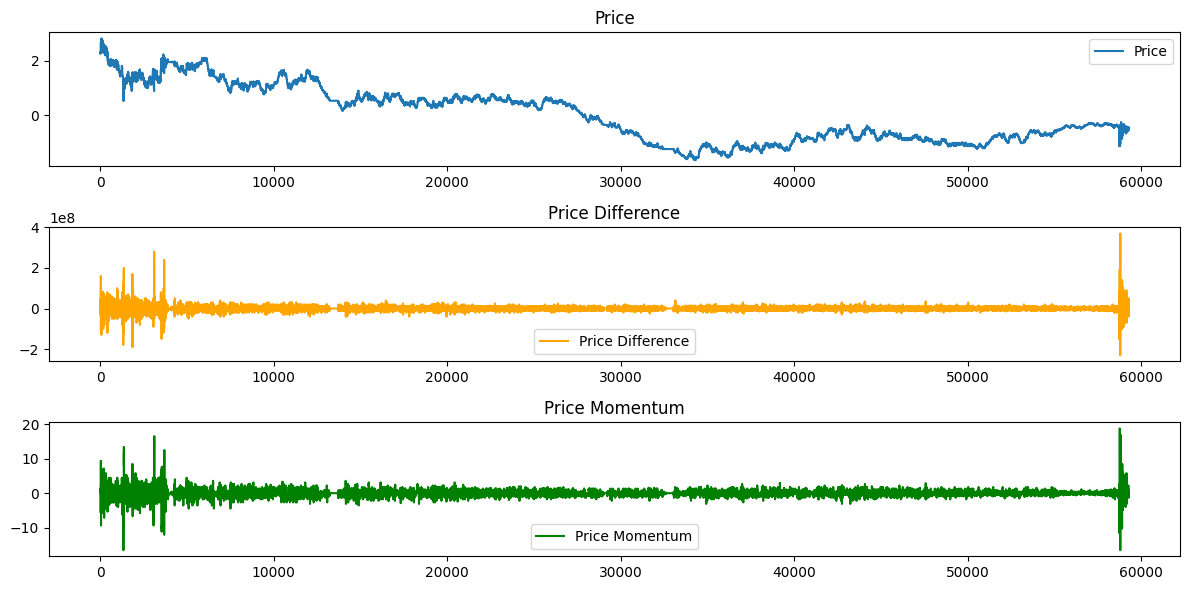

In [135]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))

# Plot price
plt.subplot(3, 1, 1)
plt.plot(data['price'], label='Price')
plt.title('Price')
plt.legend()

# Plot price_diff
plt.subplot(3, 1, 2)
plt.plot(data['price_diff'], label='Price Difference', color='orange')
plt.title('Price Difference')
plt.legend()

# Plot price_momentum
plt.subplot(3, 1, 3)
plt.plot(data['price_momentum'], label='Price Momentum', color='green')
plt.title('Price Momentum')
plt.legend()

plt.tight_layout()
plt.show()


In [136]:
print(data['price_momentum'].describe())

count    5.926100e+04
mean    -1.190013e-17
std      1.000008e+00
min     -1.656980e+01
25%     -4.359269e-01
50%      1.223617e-02
75%      4.603992e-01
max      1.883509e+01
Name: price_momentum, dtype: float64


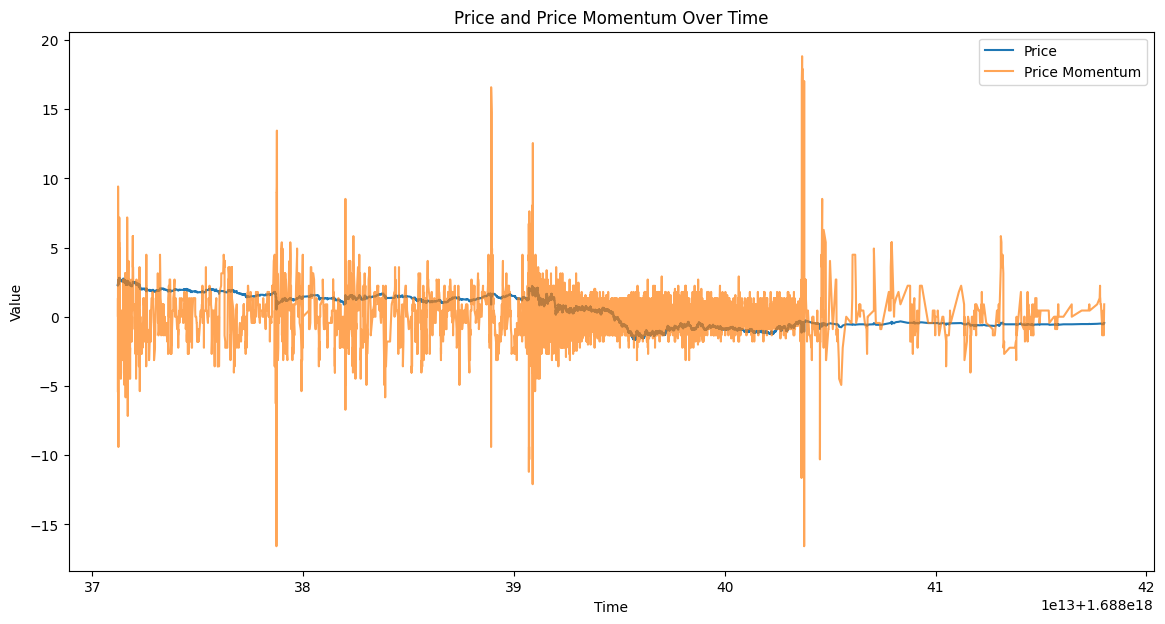

In [137]:
import matplotlib.pyplot as plt

plt.figure(figsize=(14, 7))
plt.plot(data['ts_event'], data['price'], label='Price')
plt.plot(data['ts_event'], data['price_momentum'], label='Price Momentum', alpha=0.7)
plt.xlabel('Time')
plt.ylabel('Value')
plt.title('Price and Price Momentum Over Time')
plt.legend()
plt.show()


In [138]:
# 5. VWAP Deviation
data['vwap'] = (data['price'] * data['size']).cumsum() / data['size'].cumsum()
data['vwap_deviation'] = data['price'] - data['vwap']

"""
This feature calculates the deviation of the current price from the VWAP, which is a measure of the average price a security has traded at, weighted by volume.

Implementation - VWAP deviation can be used to assess whether the current price is overbought or oversold relative to the average price paid by
market participants, providing a signal for potential mean reversion or continuation.
"""

'\nThis feature calculates the deviation of the current price from the VWAP, which is a measure of the average price a security has traded at, weighted by volume.\n\nImplementation - VWAP deviation can be used to assess whether the current price is overbought or oversold relative to the average price paid by \nmarket participants, providing a signal for potential mean reversion or continuation.\n'

In [139]:
print(data['vwap_deviation'].describe())
# Display a sample of the data
print(data[['ts_event','price','vwap','vwap_deviation']].head())

count    59261.000000
mean        -1.075118
std          0.569990
min         -2.545094
25%         -1.407090
50%         -1.023327
75%         -0.699348
max          0.635950
Name: vwap_deviation, dtype: float64
               ts_event     price      vwap  vwap_deviation
10  1688371204221640177  2.309412  2.309412    0.000000e+00
11  1688371204230510085  2.309412  2.309412    0.000000e+00
12  1688371204232021933  2.309412  2.309412    0.000000e+00
13  1688371204245041198  2.309412  2.309412    4.440892e-16
14  1688371204457853104  2.256081  2.292209   -3.612722e-02


In [140]:
from sklearn.preprocessing import MinMaxScaler

# Initialize Scaler

scaler = MinMaxScaler()
data['scaled_vwap_deviation'] = scaler.fit_transform(data[['vwap_deviation']])

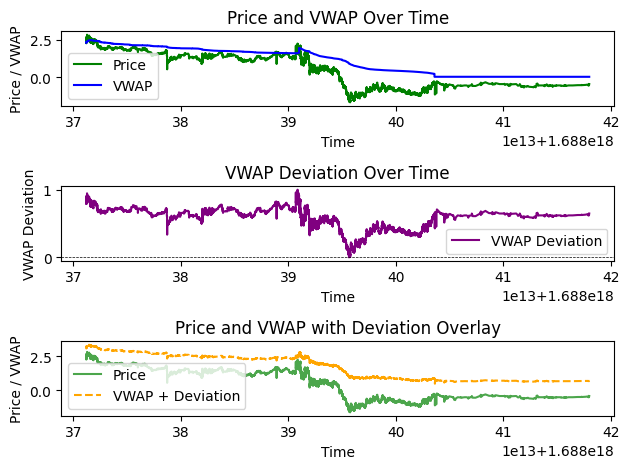

In [141]:

plt.figure()

# Plot Price and VWAP
plt.subplot(3, 1, 1)
plt.plot(data['ts_event'], data['price'], label='Price', color='green')
plt.plot(data['ts_event'], data['vwap'], label='VWAP', color='blue')
plt.xlabel('Time')
plt.ylabel('Price / VWAP')
plt.title('Price and VWAP Over Time')
plt.legend() # observation - market changing sentiment nill

# Plot VWAP Deviation
plt.subplot(3, 1, 2)
plt.plot(data['ts_event'], data['scaled_vwap_deviation'], label='VWAP Deviation', color='purple')
plt.axhline(0, color='black', linestyle='--', linewidth=0.5)
plt.xlabel('Time')
plt.ylabel('VWAP Deviation')
plt.title('VWAP Deviation Over Time')
plt.legend() # no potential mean reversion- moving exactly the same as price

# Combined Plot of Price and VWAP Deviation
plt.subplot(3, 1, 3)
plt.plot(data['ts_event'], data['price'], label='Price', color='green', alpha=0.7)
plt.plot(data['ts_event'], data['scaled_vwap_deviation'] + data['vwap'], label='VWAP + Deviation', color='orange', linestyle='--')
plt.xlabel('Time')
plt.ylabel('Price / VWAP')
plt.title('Price and VWAP with Deviation Overlay')
plt.legend() #orange line shows how the deviation from the VWAP would impact the price

plt.tight_layout()
plt.show()


In [142]:
# Calculate the target variable based on price changes
data['target'] = (data['price'].shift(-1) > data['price']).astype(int)
data

,ts_recv,ts_event,rtype,publisher_id,instrument_id,action,side,depth,price,size,...,symbol,liquidity_imbalance,order_arrival_rate,order_book_skew,price_diff,price_momentum,vwap,vwap_deviation,scaled_vwap_deviation,target
10,1688371204221804306,1688371204221640177,1,2,32,T,B,0,2.309412,28,...,AAPL,-0.989474,4.225682e-07,-188.0,0.0,-5.365721,2.309412,0.000000e+00,0.800081,0
11,1688371204230674565,1688371204230510085,1,2,32,T,B,0,2.309412,10,...,AAPL,-0.987654,1.127407e-07,-160.0,0.0,-4.917558,2.309412,0.000000e+00,0.800081,0
12,1688371204232185972,1688371204232021933,1,2,32,T,B,0,2.309412,22,...,AAPL,-0.986842,6.614422e-07,-150.0,0.0,-4.917558,2.309412,0.000000e+00,0.800081,0
13,1688371204245205350,1688371204245041198,1,2,32,T,B,0,2.309412,3,...,AAPL,-0.984615,7.680925e-08,-128.0,0.0,-4.917558,2.309412,4.440892e-16,0.800081,0
14,1688371204458017831,1688371204457853104,1,2,32,T,N,0,2.256081,30,...,AAPL,-0.984252,4.698985e-09,-125.0,-30000000.0,-1.332253,2.292209,-3.612722e-02,0.788724,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59266,1688417954514485218,1688417954514320323,1,2,32,T,B,0,-0.463783,6,...,AAPL,0.702128,2.217112e-11,33.0,40000000.0,0.460399,0.036800,-5.005821e-01,0.642717,0
59267,1688417961020718430,1688417961020553920,1,2,32,T,B,0,-0.463783,1,...,AAPL,0.951220,1.536988e-10,39.0,0.0,0.460399,0.036799,-5.005820e-01,0.642717,0
59268,1688417973297905504,1688417973297741235,1,2,32,T,A,0,-0.534890,5,...,AAPL,0.739130,8.145188e-11,34.0,-40000000.0,-1.332253,0.036799,-5.716892e-01,0.620364,1
59269,1688417996889779362,1688417996889614660,1,2,32,T,B,0,-0.446006,3,...,AAPL,0.372549,4.238748e-11,19.0,50000000.0,0.908562,0.036799,-4.828046e-01,0.648306,0


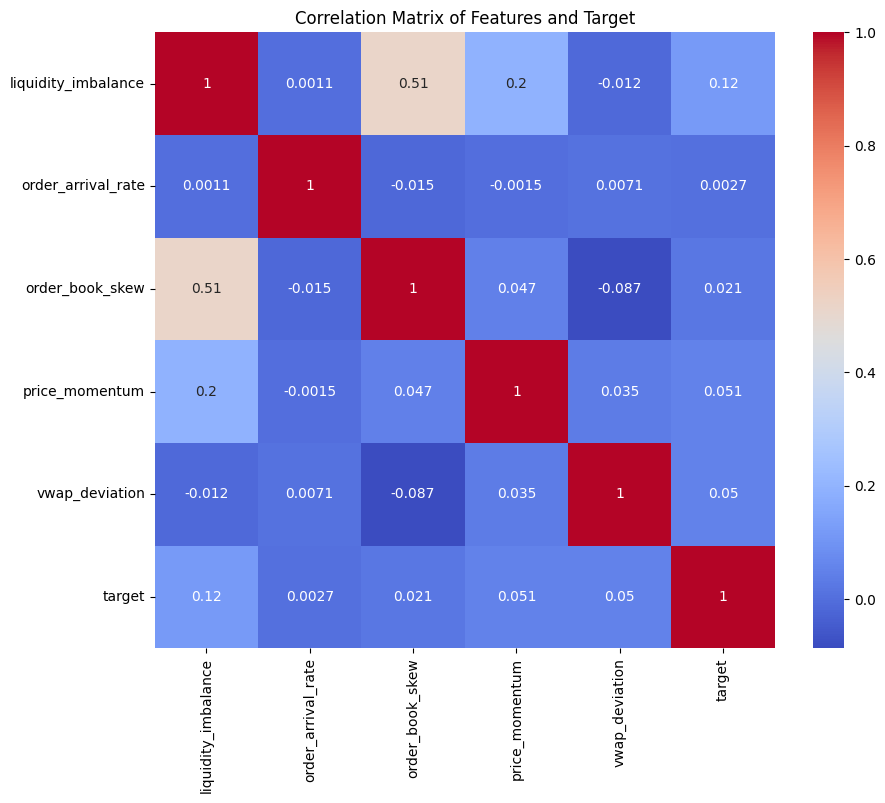

In [143]:
import seaborn as sns
import matplotlib.pyplot as plt

# Calculate the correlation matrix
features = ['liquidity_imbalance', 'order_arrival_rate', 'order_book_skew', 'price_momentum', 'vwap_deviation']
correlation_matrix = data[features + ['target']].corr()

# Plotting the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix of Features and Target')
plt.show()

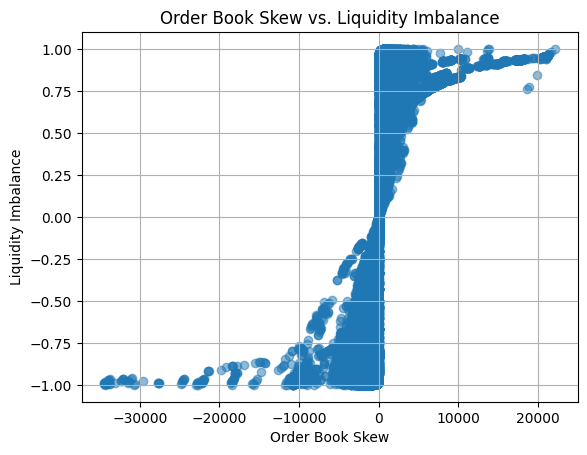

In [145]:
#visualising high correlation between order book skew and liquidity imbalance
plt.figure()

plt.scatter(data['order_book_skew'], data['liquidity_imbalance'], alpha=0.5)
plt.xlabel('Order Book Skew')
plt.ylabel('Liquidity Imbalance')
plt.title('Order Book Skew vs. Liquidity Imbalance')
plt.grid(True)
plt.show()
#obs. - higher skew is associated with higher liquidity imbalance
# strong market sentiment - buy and selling pressures

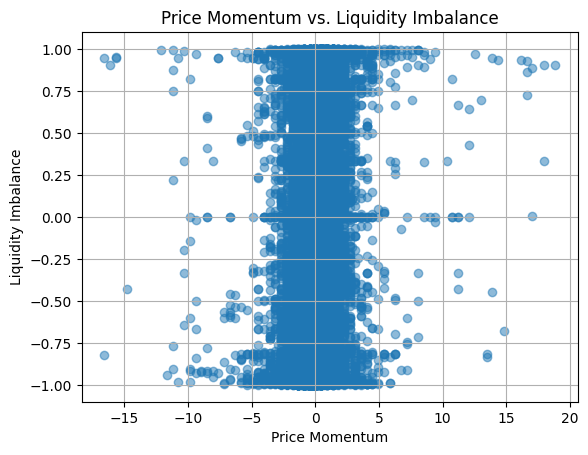

In [147]:
#visualising correlation between price momentum and liquidity imbalance

plt.figure()

plt.scatter(data['price_momentum'], data['liquidity_imbalance'], alpha=0.5)
plt.xlabel('Price Momentum')
plt.ylabel('Liquidity Imbalance')
plt.title('Price Momentum vs. Liquidity Imbalance')
plt.grid(True)
plt.show()


#positive correlation - same direction - e.g. if liquidity imbalance indicates a stronger bid side, it might coincide with upward price momentum

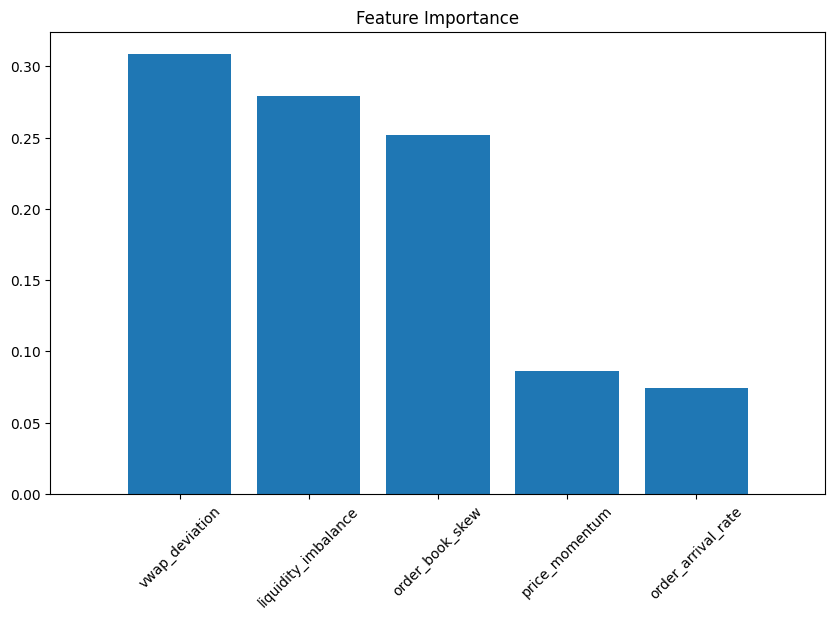

In [144]:
from sklearn.ensemble import RandomForestClassifier
import numpy as np

X = data[features]
y = data['target']

#train a Random Forest model
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X, y)

# feature importances
importances = model.feature_importances_
indices = np.argsort(importances)[::-1]

#plot the feature importances
plt.figure(figsize=(10, 6))
plt.title("Feature Importance")
plt.bar(range(X.shape[1]), importances[indices], align="center")
plt.xticks(range(X.shape[1]), [features[i] for i in indices], rotation=45)
plt.xlim([-1, X.shape[1]])
plt.show()
